# Mini-Project on Big Data (MPBD)
### Here is the link to the latest code on GitHub: [Lab 6](https://github.com/stop1204/EEE4463/tree/main/Labs/Lab6) 😎
### pls put the `Sx.csv` files in the `./data` folder. and the output file will be saved in the execution folder.

## `Conclusion`
when I finished the project, I found that the following feeling and conclusions:
1. the each step need to be tested and verified, otherwise you will get the wrong result and waste time to debug.
2. the data cleaning is very important, so know the correct and efficient cleaning method important too, like [.agg / .filter / regex]() and other parameters of method which can help you to clean the data quickly and correctly.
3. sometimes the plot is not necessary when you parse it, but it can help you to share with the data result to other people who can quickly understand the data
4. between the lab I leant the data result maybe wrong and need to use difference method to verify it, to double check the result is correct.
5. the threshold filter logic is also a data cleaning method. I make the auto decrease threshold to filter the corr value, to find the best threshold to show the heatmap. this can help me to analyze the data more efficiently.
6. and lastly, the project is very interesting and can help me to understand the data processing and analysis, and I can use the method to solve some simply data analysis problem in the future.

## Requirement 1
### Consolidate 5 CSV files into a single CSV file

In [1]:
# requirements for the project
import numpy as np
import pandas as pd
import os

In [2]:
#show the all files in the folder
folder_path= "./data/"
files = os.listdir(folder_path)
print(files)
# Excepted
# 5 files ['S4.csv', 'S5.csv', 'S2.csv', 'S3.csv', 'S1.csv']

['S4.csv', 'S5.csv', 'S2.csv', 'S3.csv', 'S1.csv']


In [3]:
# Read the CSV files
df = pd.DataFrame()
for i in range(len(files)):
    if i == 0:
        df = pd.read_csv(folder_path + files[i])
    else:
        # we don't use concat because we have the same student in different files
        df = pd.merge(df, pd.read_csv(folder_path + files[i]), on="Student", how="inner")
df.info()
# Excepted
# 31 modules

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Student  67 non-null     object 
 1   L004     67 non-null     int64  
 2   V019     57 non-null     float64
 3   V020     67 non-null     int64  
 4   V021     67 non-null     int64  
 5   V022     64 non-null     float64
 6   V023     66 non-null     float64
 7   V024     67 non-null     int64  
 8   L005     67 non-null     int64  
 9   P001     55 non-null     float64
 10  V025     67 non-null     int64  
 11  L002     67 non-null     int64  
 12  V008     66 non-null     float64
 13  V009     67 non-null     int64  
 14  V010     67 non-null     int64  
 15  V011     66 non-null     float64
 16  V012     66 non-null     float64
 17  V013     66 non-null     float64
 18  V014     67 non-null     int64  
 19  L003     67 non-null     int64  
 20  V015     67 non-null     int64  
 21  V016     67 non-nu

In [4]:
# save the merged data to a new file
with open("He_Hua_Liang.csv", "w") as f:
    df.to_csv(f, index=False)

## Requirement 2
### Count the number of students who completed all 5 semesters

In [5]:
# drop the rows with NaN
df = df.dropna()

# count the number of students and confirm there are no duplicates
print(len(df["Student"].unique()))
df["Student"].count()
# Excepted
# 50

50


50

## Requirement 3
### Statistics (mean/ maximum/ minimum/ standard deviation of module marks) of the designated modules - V005, V012, V015

In [6]:
# # test the regex and sum of the cols
# df.filter(regex=r"^L\d.*").sum(axis=1).head()

In [7]:
# # test the statistics of all L V P modules by each student
# # module_L = df.filter(regex=r"^L\d.*")
# # module_L
# # df["L_sum"] =  df[module_L.columns].sum(axis=1)
# # df["L_mean"] =  df[module_L.columns].mean(axis=1)
# # df["L_max"] =  df[module_L.columns].max(axis=1)
# # df["L_min"] =  df[module_L.columns].min(axis=1)
# # df[["Student","L_sum"]]
# # df
# modules_prefix = ["L", "V", "P"]
# for module in modules_prefix:
#     module_cols = df.filter(regex=rf"^{module}\d.*")
#     df[f"{module}_sum"] = module_cols.sum(axis=1)
#     df[f"{module}_mean"] = module_cols.mean(axis=1)
#     df[f"{module}_max"] = module_cols.max(axis=1)
#     df[f"{module}_min"] = module_cols.min(axis=1)
# # df.filter(regex=".*(m|s).*").columns
# # Index(['L_sum', 'L_mean', 'L_max', 'L_min', 'V_sum', 'V_mean', 'V_max', 'V_min', 'P_sum', 'P_mean', 'P_max', 'P_min'], dtype='object')
# df.filter(regex=".*(m|s|Student).*").head()

In [8]:
#
statictics_V005 =  df[["V005","V012","V015"]].agg(["mean", "max", "min", "std"])
# precision = 2
statictics_V005.round(2)
# excpected
# mean,68.22,69.68,66.78
# max,87.00,84.00,89.00
# min,50.00,52.00,40.00
# std,8.51,9.08,10.97


,V005,V012,V015
mean,68.22,69.68,66.78
max,87.00,84.00,89.00
min,50.00,52.00,40.00
std,8.51,9.08,10.97


## Requirement 4
### Histogram of the designated module - V010

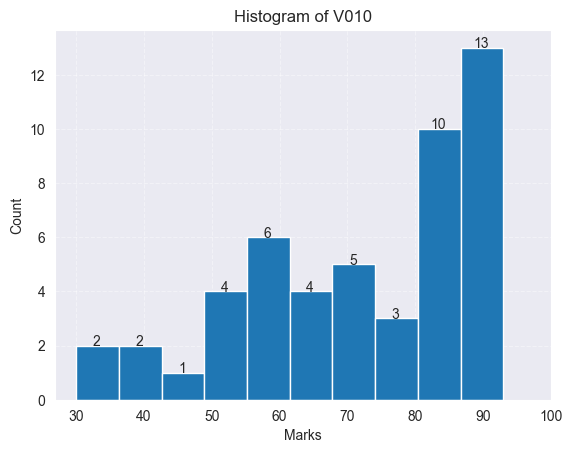

In [9]:
# set the plot style
plt = df["V010"].plot.hist(bins=10)
plt.set_xticks(range( df["V010"].min(), 101, 10))
plt.set_xlabel("Marks")
plt.set_ylabel("Count")
plt.set_title("Histogram of V010")
plt.grid(True, linestyle='--', alpha=0.4,)
# plt.set_xlim(0,100)
# set the label on the top of the bar
for label in plt.patches:
    plt.annotate(int(label.get_height()), (label.get_x()+3, label.get_height()),ha='center')

## Requirement 5 (NOT needed for those who completed Requirement 1)
### Box plot of the designated module - V???

## Requirement 6
### Pie chart of the designated module - V013

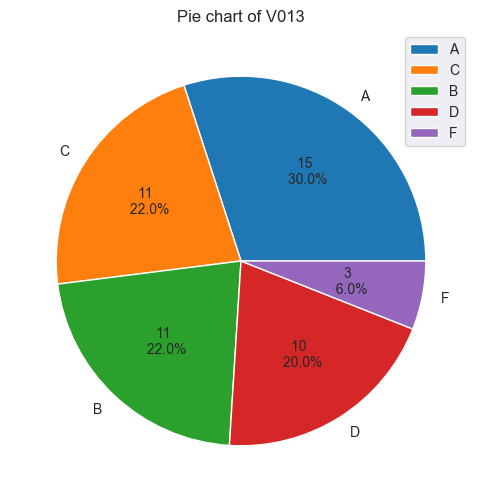

In [10]:
labels_grade = ["F","D","C","B","A"]
mark_ranges = [0,40,50,60,70,100]

# cut method is default to left=True , the left side is included
total_count = df["V013"].count()
data_pie = pd.cut(df["V013"], bins=mark_ranges, labels=labels_grade,right=False)
plt = data_pie.value_counts().plot.pie(autopct=lambda x: f'{(x)*total_count/100:.0f} \n {x:.1f}%',figsize=(6,6))
plt.set_title("Pie chart of V013")
plt.set_ylabel("")
plt.legend(loc='upper right')

## Requirement 7A
### Underlying relationship 1
### ✅ the performance of two vocational (EEE) modules V019 and V023 is highly correlated
the corr method is use 'pearson' method to evaluate the correlation between the two modules, the result value will be betwenn -1 and 1.
- the value close to 1 means the two modules are highly correlated.
- the value close to -1 means the two modules are negatively correlated.
- the value close to 0 means the two modules are not correlated.

I dont set the `vmin` parameter here, so the value will be between 0 and 1.

In [11]:
# filter out the 'max' 'min' 'mean' 'std' columns
# corr = df.filter(regex="^(?!Student|._m|._s).*").corr(method="pearson")

corr = df.filter(regex="^V0..").corr(method="pearson") # pearson / kendall / spearman / callable
print(corr)

          V019      V020      V021      V022      V023      V024      V025  \
V019  1.000000  0.448091  0.536229  0.434081  0.905059  0.746051  0.568979   
V020  0.448091  1.000000  0.454999  0.509713  0.422232  0.263576  0.234445   
V021  0.536229  0.454999  1.000000  0.861233  0.500359  0.430421  0.513508   
V022  0.434081  0.509713  0.861233  1.000000  0.416584  0.277749  0.529278   
V023  0.905059  0.422232  0.500359  0.416584  1.000000  0.740114  0.602201   
V024  0.746051  0.263576  0.430421  0.277749  0.740114  1.000000  0.373055   
V025  0.568979  0.234445  0.513508  0.529278  0.602201  0.373055  1.000000   
V008  0.377515  0.412798  0.616242  0.601768  0.480216  0.255111  0.431796   
V009  0.346251  0.171457  0.284769  0.284586  0.408717  0.091037  0.355405   
V010  0.291171  0.514807  0.564787  0.639570  0.332314  0.017171  0.315339   
V011  0.385646  0.531960  0.639999  0.756219  0.450550  0.235325  0.464803   
V012  0.425916  0.431774  0.605498  0.681328  0.475216  0.276803

### Heatmap of the correlation matrix showing the relationship between the V019 and V023 is proximate to 0.90 which is the highest among the matrix

[]

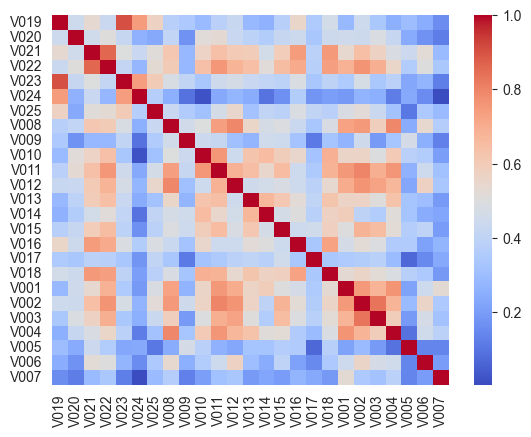

In [12]:
import seaborn as sns
# exclude the Student column
sns.heatmap(corr, annot=False, cmap='coolwarm', vmax=1, fmt='.3f').plot()


In [13]:
# remove the 1.0 in the corr and show the max value
corr = corr.mask(corr == 1.0)
# filter the corr value > 0.8
# corr = corr[corr > 0.8]
max_corr = corr.max().max()
print(max_corr)
# Excepted
# 0.9050589220545983
corr.unstack().idxmax()
# Excepted
# ('V019', 'V023')

0.9050589220545983


('V019', 'V023')

## Requirement 7B
### Underlying relationship 2
### ✅the performance of two vocational (EEE) modules V011 and V012  with a language (LAN) module L002 is highly correlated

In [14]:
# Select the L and V modules
module_L = df.filter(regex=r"^L\d.*")
module_V = df.filter(regex=r"^V\d.*")
# make the correlation matrix
corr = df.filter(regex=r"^(L|V)\d.*").corr(method="pearson")
# sort the columns
corr_L_V = corr.loc[module_L.columns, module_V.columns]

threshold:  0.6000000000000001


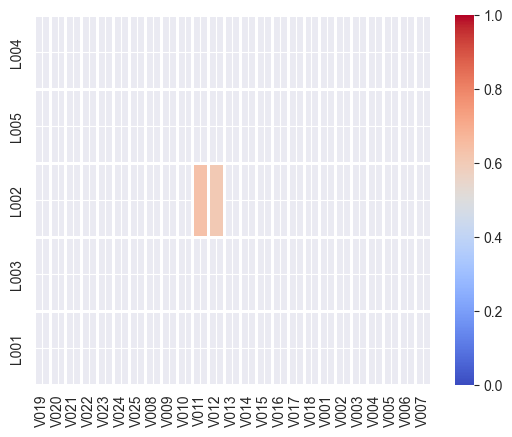

In [15]:
# filter the corr value by auto threshold, because the modules data too much
threshold = 0
for i in range(10).__reversed__():
    if not np.isnan(  corr_L_V[corr_L_V> i * 0.1].max().max()  ):
        # print(corr_L_V[corr_L_V> i * 0.1].max().max())
        print("threshold: ", i*0.1)
        threshold = i*0.1
        break
# just show the value > threshold heatmap
corr_L_V_filtered = corr_L_V[corr_L_V > threshold]
# add some perameters to make the heatmap more evident
sns.heatmap(corr_L_V_filtered, annot=False, cmap='coolwarm', vmin=0,vmax=1, fmt='.3f',linewidth=1).grid(True)